In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

In [331]:
pd

<module 'pandas' from '/lib/python3.11/site-packages/pandas/__init__.py'>

In [332]:
np

<module 'numpy' from '/lib/python3.11/site-packages/numpy/__init__.py'>

In [333]:
plt

<module 'matplotlib.pyplot' from '/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [334]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [335]:
DecisionTreeClassifier

sklearn.tree._classes.DecisionTreeClassifier

In [336]:
df = pd.read_csv("car_data1.csv")

In [337]:
df.head()

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,class
0,0,vhigh,vhigh,2,2,small,low,unacc
1,1,vhigh,vhigh,2,2,small,med,unacc
2,2,vhigh,vhigh,2,2,small,high,unacc
3,3,vhigh,vhigh,2,2,med,low,unacc
4,4,vhigh,vhigh,2,2,med,med,unacc


# Data Cleaning

In [338]:
df.columns

Index(['Unnamed: 0', 'buying', 'maint', 'doors', 'persons', 'lug_boot',
       'safety', 'class'],
      dtype='object')

In [339]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [340]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [341]:
for column in df:
    print(column)
    print(df[column].unique())

buying
['vhigh' 'high' 'med' 'low']
maint
['vhigh' 'high' 'med' 'low']
doors
['2' '3' '4' '5more']
persons
['2' '4' 'more']
lug_boot
['small' 'med' 'big']
safety
['low' 'med' 'high']
class
['unacc' 'acc' 'vgood' 'good']


In [342]:
df = df.dropna(subset = 'class')

In [343]:
for c in df.columns:
    modevalue = df[c].mode()
    df[c].fillna(modevalue,inplace = True)

In [344]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# Data Transformation

In [345]:
df['doors'].replace(['2','3','4','5more'],['low','med','high','vhigh'],inplace = True)

In [346]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,low,2,small,low,unacc
1,vhigh,vhigh,low,2,small,med,unacc
2,vhigh,vhigh,low,2,small,high,unacc
3,vhigh,vhigh,low,2,med,low,unacc
4,vhigh,vhigh,low,2,med,med,unacc


In [347]:
df['persons'].replace(['2', '4', 'more'], ['low', 'med', 'high'], inplace=True)

In [348]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,low,low,small,low,unacc
1,vhigh,vhigh,low,low,small,med,unacc
2,vhigh,vhigh,low,low,small,high,unacc
3,vhigh,vhigh,low,low,med,low,unacc
4,vhigh,vhigh,low,low,med,med,unacc


In [349]:
for column in df:
    print(column)
    print(df[column].unique())

buying
['vhigh' 'high' 'med' 'low']
maint
['vhigh' 'high' 'med' 'low']
doors
['low' 'med' 'high' 'vhigh']
persons
['low' 'med' 'high']
lug_boot
['small' 'med' 'big']
safety
['low' 'med' 'high']
class
['unacc' 'acc' 'vgood' 'good']


# Data Visualization

Text(0, 0.5, 'no of tuples')

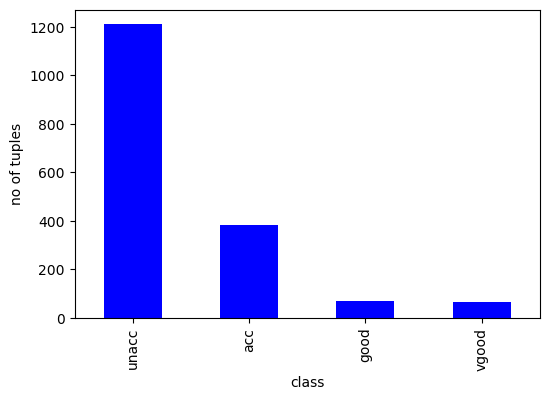

In [350]:
plt.figure(figsize = (6,4))
df['class'].value_counts().plot(kind = 'bar',color = 'blue')
plt.xlabel('class')
plt.ylabel('no of tuples')

Text(0, 0.5, 'no of tuples')

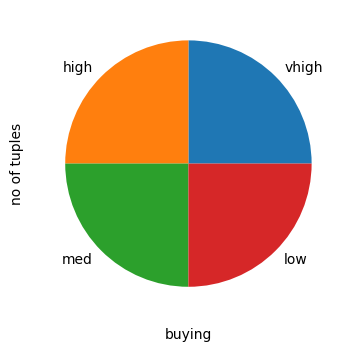

In [351]:
plt.figure(figsize = (6,4))
df['buying'].value_counts().plot(kind = 'pie')
plt.xlabel('buying')
plt.ylabel('no of tuples')

Text(0, 0.5, 'no of tuples')

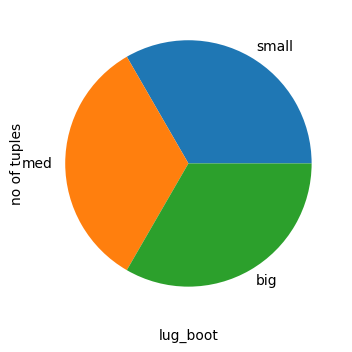

In [352]:
plt.figure(figsize = (6,4))
df['lug_boot'].value_counts().plot(kind = 'pie')
plt.xlabel('lug_boot')
plt.ylabel('no of tuples')

Text(0, 0.5, 'no of tuples')

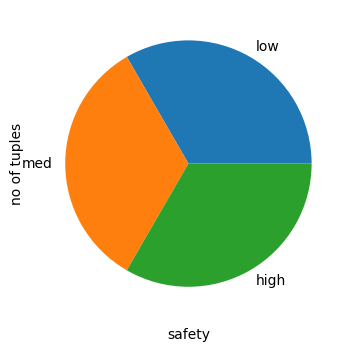

In [353]:
plt.figure(figsize = (6,4))
df['safety'].value_counts().plot(kind = 'pie')
plt.xlabel('safety')
plt.ylabel('no of tuples')

# Applying decision tree classifier

In [354]:
for column in df.columns:
    df[column] = LabelEncoder().fit_transform(df[column])

In [355]:
x = df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
y = df['class']

In [356]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [357]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [358]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,1,1,2,1,2
1,3,3,1,1,2,2,2
2,3,3,1,1,2,0,2
3,3,3,1,1,1,1,2
4,3,3,1,1,1,2,2


In [359]:
modeltree = DecisionTreeClassifier().fit(x_train,y_train)

In [360]:
y_pred = modeltree.predict(x_test)

In [361]:
y_pred[:5]

array([2, 3, 2, 0, 2])

In [362]:
report = classification_report(y_test,y_pred)

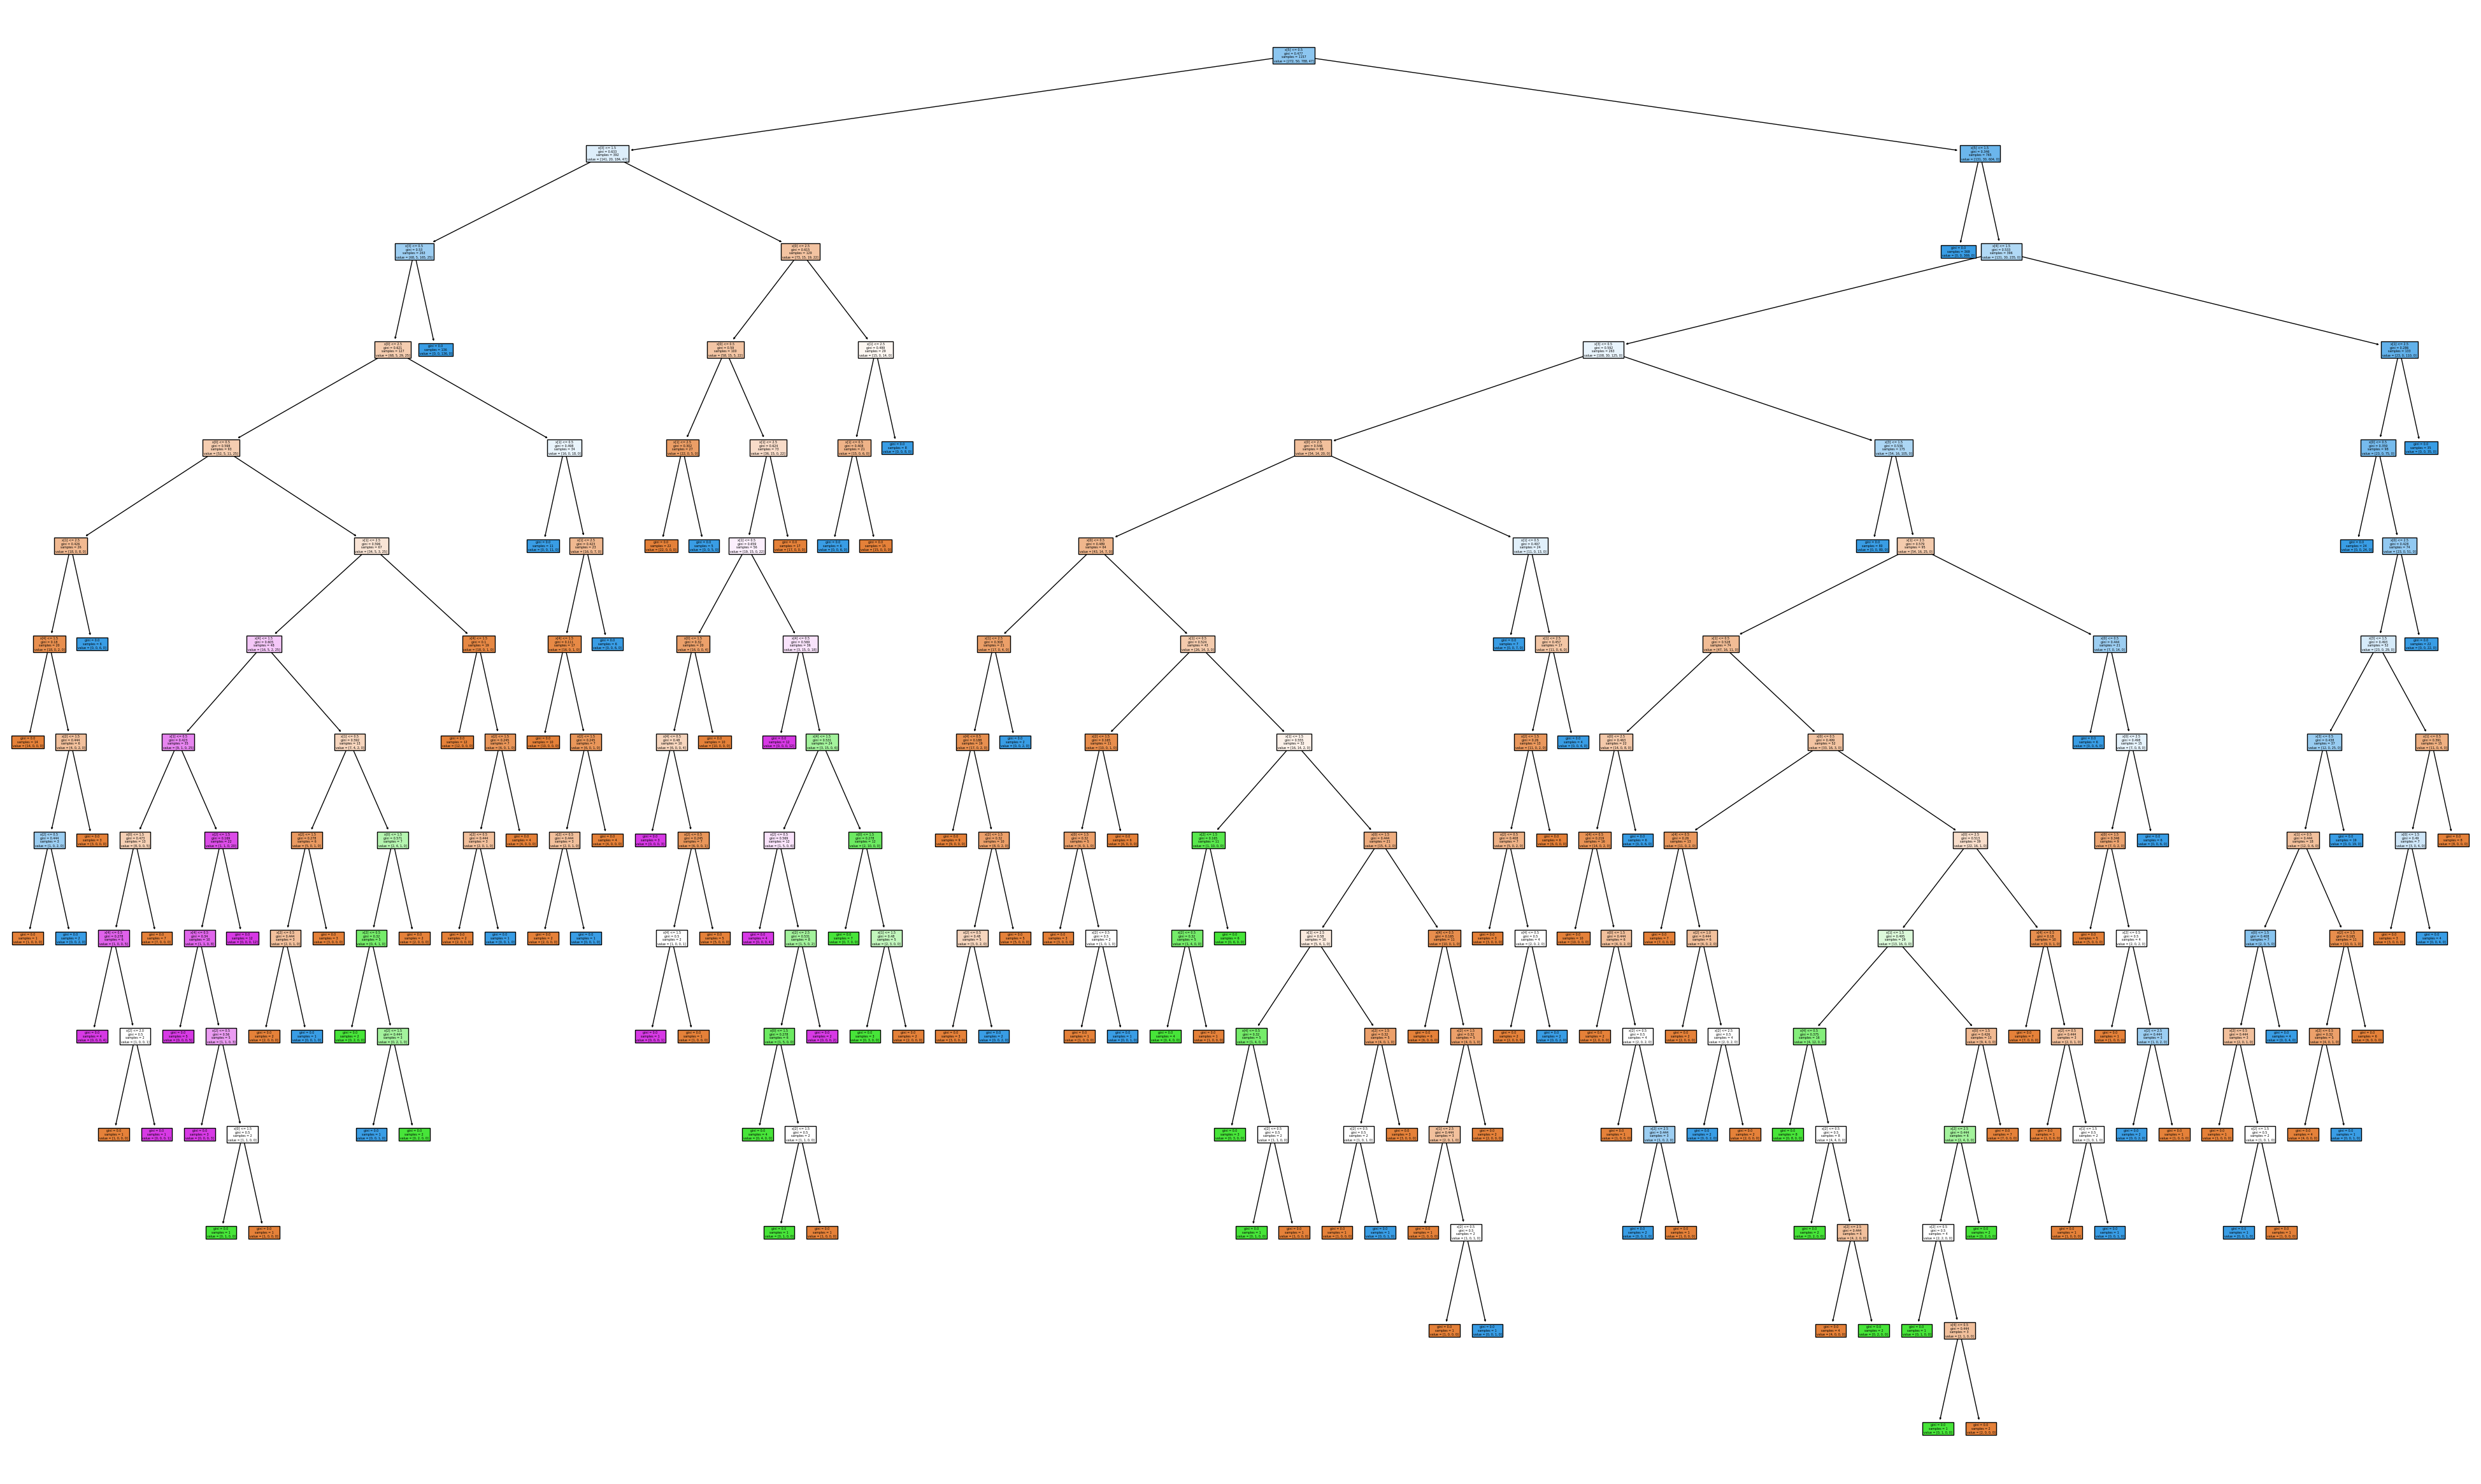

In [363]:
plt.figure(figsize = (50,30))
plot_tree(modeltree,filled = True)
plt.show()

In [364]:
print(report)

              precision    recall  f1-score   support

           0       0.83      0.95      0.88       112
           1       0.91      0.53      0.67        19
           2       0.99      0.98      0.98       422
           3       1.00      0.83      0.91        18

    accuracy                           0.95       571
   macro avg       0.93      0.82      0.86       571
weighted avg       0.95      0.95      0.95       571



In [365]:
modeltree.score(x_test,y_test)

0.9509632224168126

In [366]:
confusion_matrix(y_test,y_pred)

array([[106,   1,   5,   0],
       [  9,  10,   0,   0],
       [ 10,   0, 412,   0],
       [  3,   0,   0,  15]], dtype=int64)